In [45]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import seaborn
import io
import os
import requests
%pylab inline
url = "https://data.cityofnewyork.us/resource/g93m-jj4v.csv"
response = requests.get(url).content
data = pd.read_csv(io.StringIO(response.decode('utf-8')))

Populating the interactive namespace from numpy and matplotlib


In [46]:
data.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,amenities,average_weighted_rent,bbl,bin,borough,...,total_available_space_sf_,total_new_space_sf_,total_relet_space_sf_,total_sublet_space_sf_,total_vacant_avail_relet_space_sf_,total_vacant_avail_sublet_space_sf_,typical_floor_size,year_built,year_renovated,zoning
0,10,13094,11,8,4,NaN,-,"$1,010,150,004","$1,024,704",1,...,$nan,$nan,$nan,$nan,$nan,$nan,"$1,696","$1,920",$nan,C6-4
1,10,13094,12,10,4,NaN,-,"$1,010,370,020","$1,080,892",1,...,$nan,$nan,$nan,$nan,$nan,$nan,"$1,709",$nan,$nan,NaN
2,10,13094,12,10,4,NaN,-,"$1,010,370,035","$1,025,055",1,...,$nan,$nan,$nan,$nan,$nan,$nan,"$2,054","$1,920",$nan,C6-4
3,10,13094,12,8,4,NaN,-,"$1,010,350,036","$1,024,992",1,...,$nan,$nan,$nan,$nan,$nan,$nan,"$8,439",$nan,$nan,NaN
4,10,12081,11,10,4,NaN,-,$nan,$nan,1,...,$nan,$nan,$nan,$nan,$nan,$nan,"$5,000",$nan,$nan,NaN


In [47]:
data1 = data.copy()
for i in data.columns:
    if i != 'number_of_stories' and i != 'typical_floor_size':
        data.drop([i], axis=1, inplace=True)
data.head()

,number_of_stories,typical_floor_size
0,$5,"$1,696"
1,$4,"$1,709"
2,$5,"$2,054"
3,$3,"$8,439"
4,$2,"$5,000"


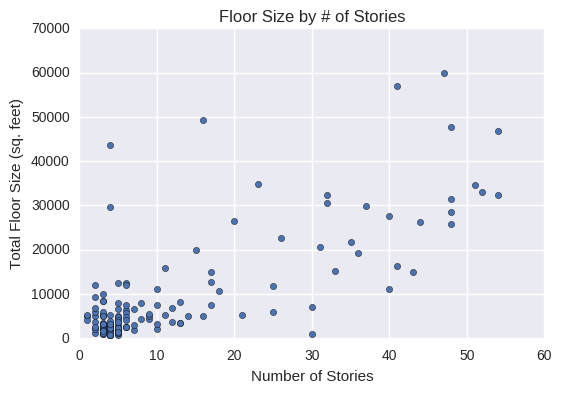

In [48]:
floors_by_stories = data.plot(['number_of_stories'],['typical_floor_size'],kind='scatter', 
                    title='Floor Size by # of Stories',
                    xlim=(0,60), ylim=(0,70000))
floors_by_stories.set_ylabel("Total Floor Size (sq. feet)")
floors_by_stories.set_xlabel("Number of Stories")

In [49]:
for i in data1.columns:
    if i != 'last_sale_price' and i != 'last_sale_date':
        data1.drop([i], axis=1, inplace=True)
data1 = data1.dropna(axis=0)
data1['last_sale_date'] = pd.to_datetime(data1['last_sale_date'])
pd.options.display.float_format = '${:,.0f}'.format
data1.head()

,last_sale_date,last_sale_price
6,1998-05-16,"$4,100,000"
7,2005-07-21,"$605,000,000"
8,2000-07-13,"$59,990,000"
12,2001-06-30,"$29,000,000"
13,1993-12-30,"$147,712,500"


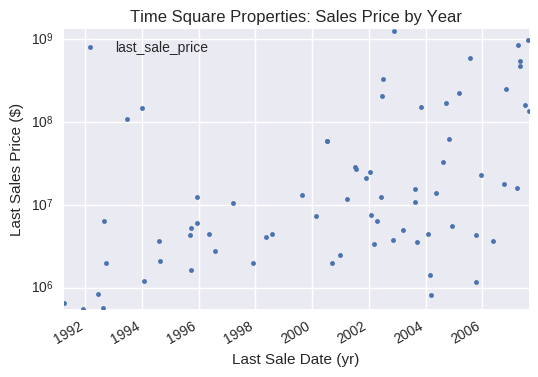

In [50]:
timePlot = data1.plot(style='.', x='last_sale_date', y='last_sale_price',
           title='Time Square Properties: Sales Price by Year',
           ylim=(0,1350000000), logy=True)
timePlot.set_ylabel("Last Sales Price ($)")
timePlot.set_xlabel("Last Sale Date (yr)")